# Sklearn

Library de machine learn:
  * Classification
  * Regression
  * Clustering
  * Reduction de dimension (=features, pca...)

http://scikit-learn.org/stable/


Attetion sklearn travail sur des object numpy.ndarray donc il faut passer du DataFrame vers numpy avecs .values

Plan :
  * Réduction de dimension
  * Clustering
  * Prédiction SVM (SVC) / RandomForest
  * Exercice



# import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os


# load dataset

In [5]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


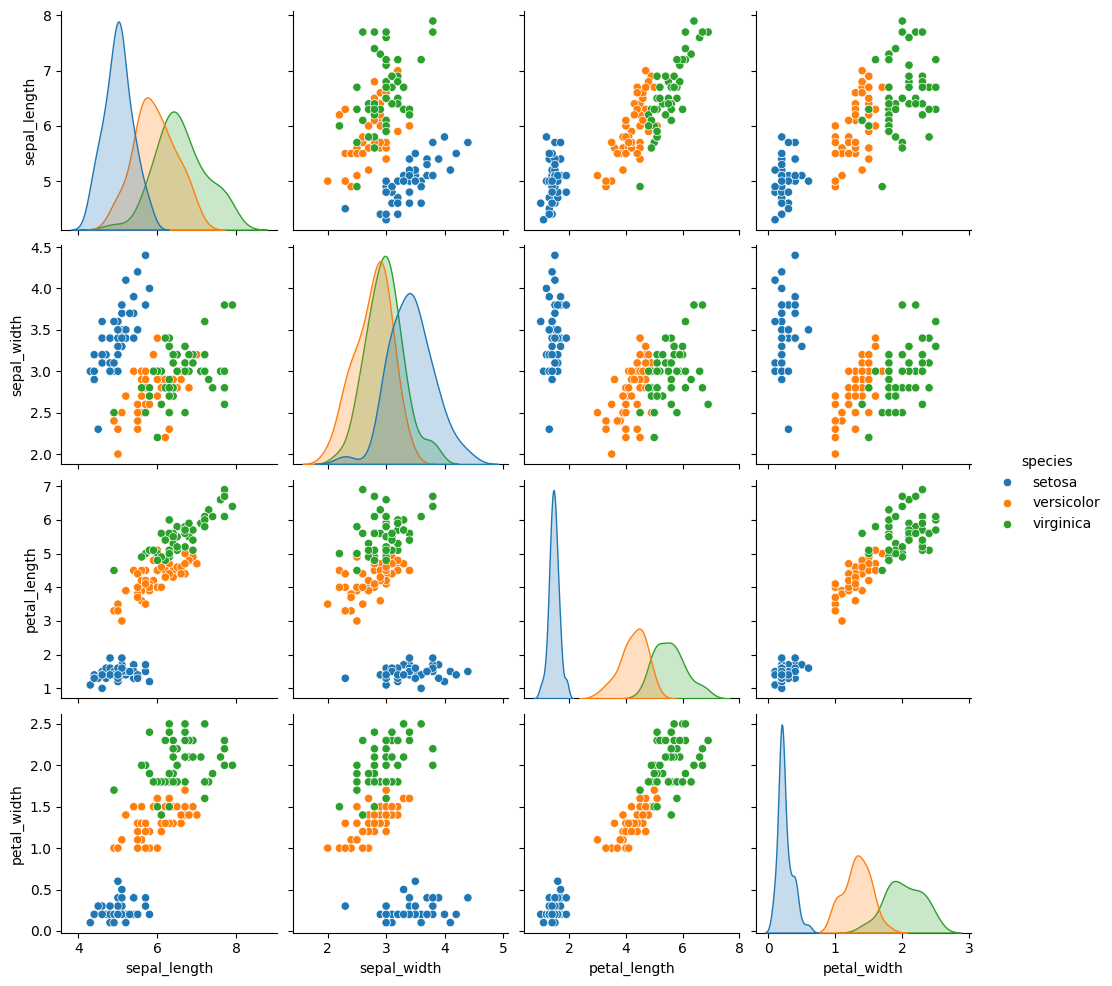

In [7]:
sns.pairplot(iris, hue="species")

# 1) Features reduction, example avec PCA

In [8]:
X = iris.drop('species', axis=1).values
Y = iris['species'].values
features = iris.columns[:-1]
target = iris.columns[-1]

print(features)
print(np.unique(Y))

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
['setosa' 'versicolor' 'virginica']


In [6]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
pca = sklearn.decomposition.PCA(n_components=2)  # 2 composantes principales
X_pca = pca.fit_transform(X_scaled)

iris_pca = pd.DataFrame(X_pca, columns=['pca0', 'pca1'], index=iris.index)
iris_pca

,pca0,pca1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


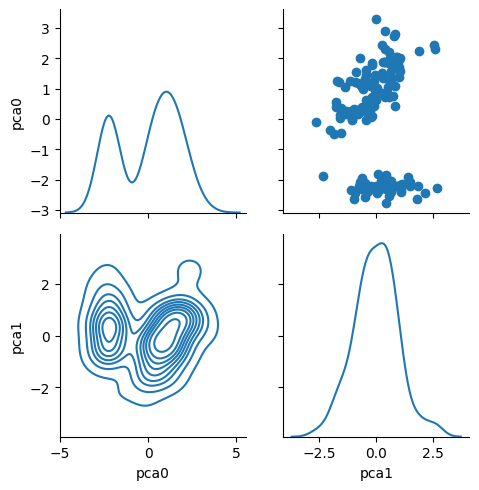

In [15]:
g = sns.PairGrid(iris_pca)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

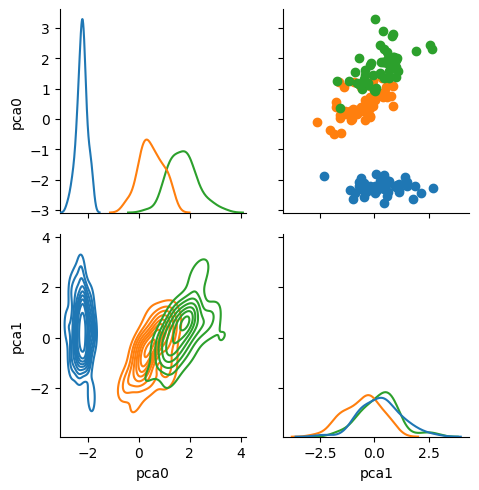

In [16]:
iris_pca['species'] = iris['species']
g = sns.PairGrid(iris_pca, hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)

In [17]:
pca.explained_variance_ratio_


array([0.72962445, 0.22850762])

In [18]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [19]:
pca.components_.T

array([[ 0.52106591,  0.37741762],
       [-0.26934744,  0.92329566],
       [ 0.5804131 ,  0.02449161],
       [ 0.56485654,  0.06694199]])

Formule de la projection = multiplication matriciel (changement de repere)

$proj = ((data - mean(data)) \cdot components^T $

In [20]:
data_pca2 = np.dot(X_scaled-np.mean(X_scaled, axis=0), pca.components_.T)

In [21]:
proj = pd.DataFrame(pca.components_.T, index=iris.columns[:-1], columns=['pca0', 'pca1'])
proj

,pca0,pca1
sepal_length,0.521066,0.377418
sepal_width,-0.269347,0.923296
petal_length,0.580413,0.024492
petal_width,0.564857,0.066942


(-1.0, 1.0)

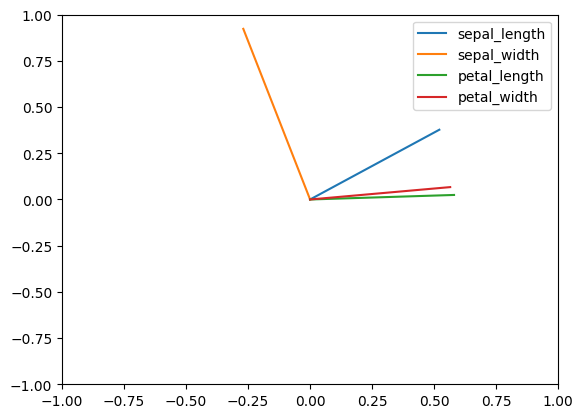

In [22]:
fig, ax = plt.subplots()
#ax.plot(iris_pca['pca0'],iris_pca['pca1'], ls='None', marker='.' )
for feat, row in proj.iterrows():
    ax.plot([0,row['pca0']], [0, row['pca1']], label=feat)
ax.legend()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)


# 2) Clustering

In [26]:
y_kmeans = sklearn.cluster.KMeans(n_clusters=3).fit_predict(X_scaled)
Y_pred = iris.copy()
Y_pred['pred_kmeans'] = y_kmeans
Y_pred

,sepal_length,sepal_width,petal_length,petal_width,species,pred_kmeans
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [23]:
Y_int = sklearn.preprocessing.LabelEncoder().fit_transform(Y)
Y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

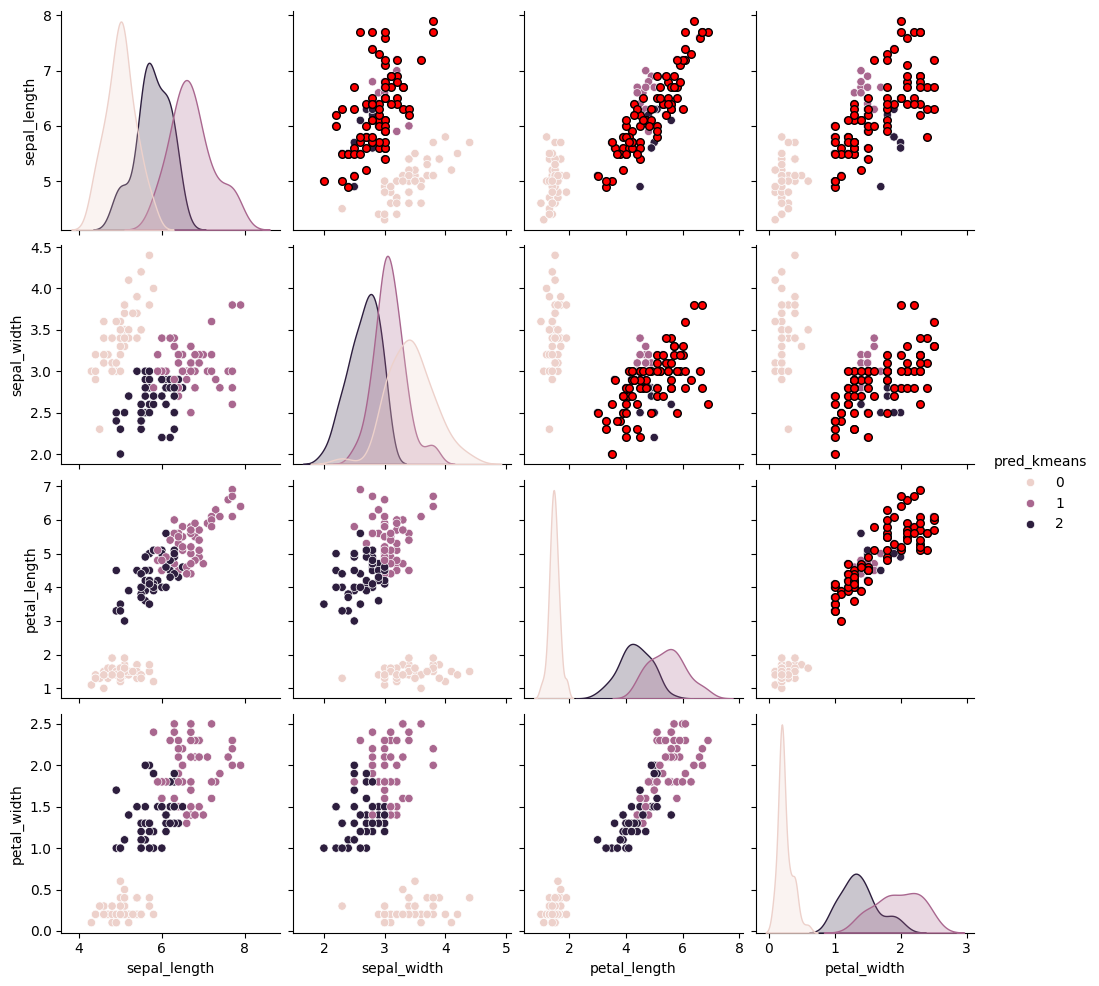

In [27]:

# Création DataFrame
df = pd.DataFrame(X, columns=features)
df['true_label'] = Y_int
df['pred_kmeans'] = y_kmeans
df['error'] = df['true_label'] != df['pred_kmeans']

# Affichage avec pairplot
# Les points incorrects sont surlignés en rouge par un style spécial
pair = sns.pairplot(df, vars=features, hue="pred_kmeans")

# Ajouter les points d'erreur en rouge
for i, j in zip(*np.triu_indices_from(pair.axes, 1)):
    ax = pair.axes[i, j]
    ax.scatter(
        df.loc[df['error'], features[j]],
        df.loc[df['error'], features[i]],
        color='red', s=30, label='Erreur', edgecolor='k'
    )



# 3) Classification (supervisée)

On des données avec plusieurs variables. On connait le label (ou une autre variable) pour un sous ensemble et on veut predir ce label (ou autre varibale) pour le reste du dataset.




## SVC = C-Support Vector Classification implémentation SVM (Support Vector Machine)


creation d'un categorie

In [9]:
X = iris.drop('species', axis=1).values
y_str = iris['species'].values
y = sklearn.preprocessing.LabelEncoder().fit_transform(y_str)


In [38]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
y_str

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [40]:
# Diviser les données en train et test
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Standardiser les données
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle SVC
svc_model = sklearn.svm.SVC(kernel='linear')  # Choisir un noyau linéaire pour simplifier
svc_model.fit(X_train, y_train)

# Prédictions
y_pred = svc_model.predict(X_test)




In [43]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

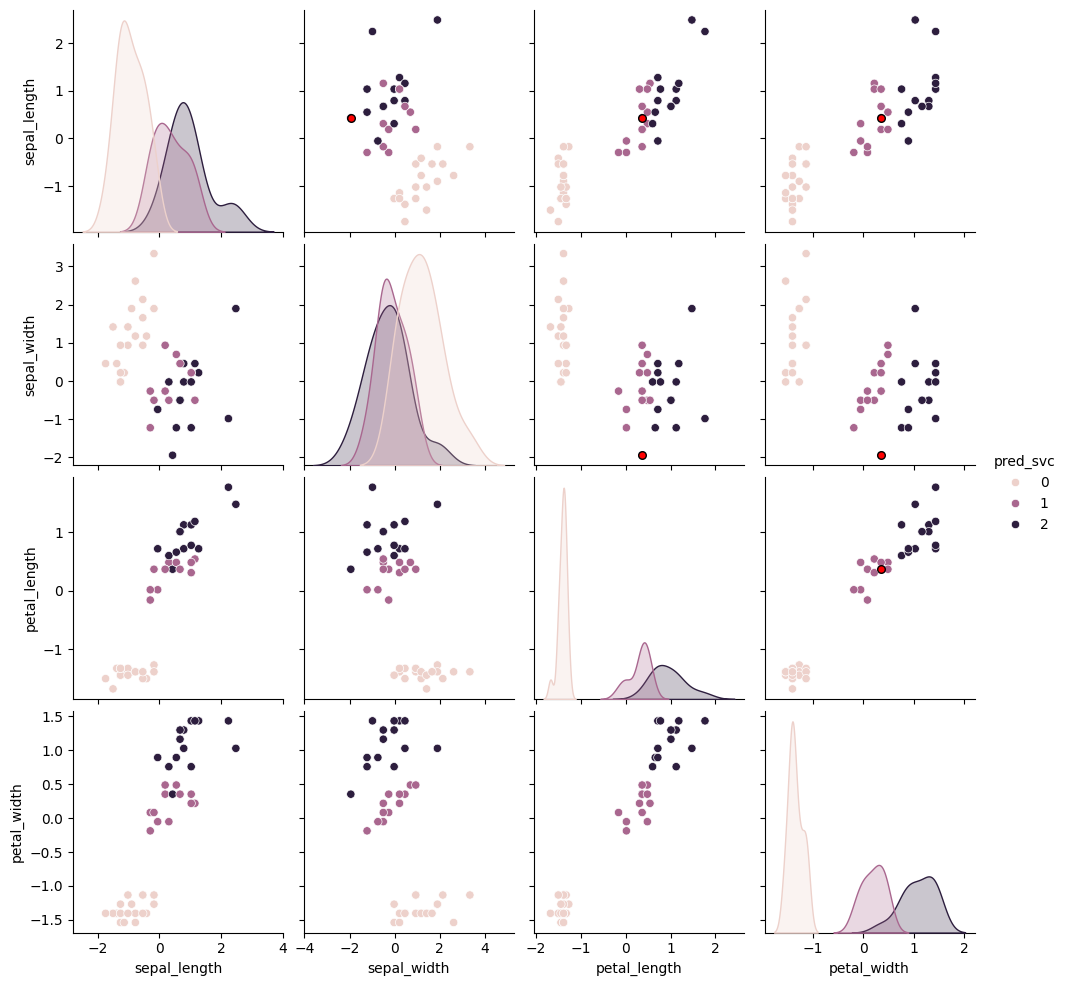

In [45]:

df = pd.DataFrame(X_test, columns=features)
df['true_label'] = y_test
df['pred_svc'] = y_pred
df['error'] = df['true_label'] != df['pred_svc']

pair = sns.pairplot(df, vars=features, hue="pred_svc")

for i, j in zip(*np.triu_indices_from(pair.axes, 1)): 
    ax = pair.axes[i, j]
    ax.scatter(
        df.loc[df['error'], features[j]], 
        df.loc[df['error'], features[i]],  
        color='red', s=30, label='Erreur', edgecolor='k', zorder=5
    )
    

In [46]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(sklearn.metrics.classification_report(y_test, y_pred))

Accuracy: 97.78%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



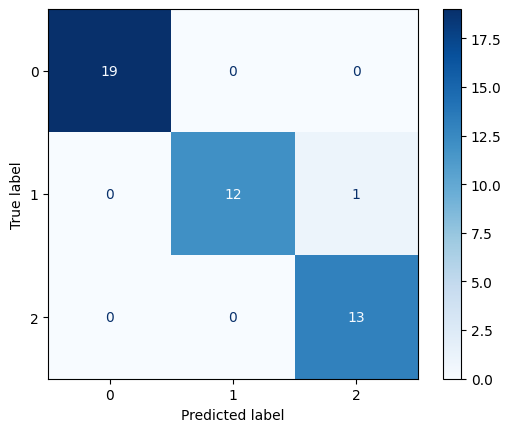

In [47]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues')


## cross validation + GridSearch

In [49]:
svc_pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.svm.SVC(kernel='linear'))

In [50]:
# cv -> 3 folds train (75%) 1 fold test (25%) 4 fois
scores = sklearn.model_selection.cross_val_score(svc_pipeline, X, y, cv=4, scoring='accuracy')
scores

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

In [59]:
pipeline = sklearn.pipeline.make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.svm.SVC())

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid = sklearn.model_selection.GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    refit='f1',
    cv=4,
    return_train_score=True,
)

grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best F1 score:", grid.best_score_)

Best params: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best F1 score: 0.9667496443812233


## RandomForest

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



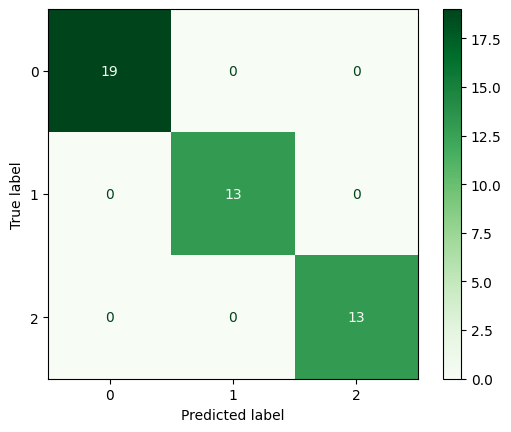

In [11]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Greens')

# Rapport de classification
print("Classification Report :\n")
print(sklearn.metrics.classification_report(y_test, y_pred))

[Text(0.5, 0.9, 'petal_width <= 1.65\ngini = 0.624\nsamples = 68\nvalue = [18, 39, 48]\nclass = virginica'),
 Text(0.2, 0.7, 'petal_width <= 0.8\ngini = 0.518\nsamples = 42\nvalue = [18, 38, 5]\nclass = versicolor'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [18, 0, 0]\nclass = setosa'),
 Text(0.3, 0.5, 'petal_length <= 4.85\ngini = 0.206\nsamples = 26\nvalue = [0, 38, 5]\nclass = versicolor'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(0.4, 0.3, 'petal_width <= 1.55\ngini = 0.278\nsamples = 4\nvalue = [0, 1, 5]\nclass = virginica'),
 Text(0.3, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.1, '\n  (...)  \n'),
 Text(0.8, 0.7, 'petal_length <= 4.85\ngini = 0.044\nsamples = 26\nvalue = [0, 1, 43]\nclass = virginica'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'petal_length <= 4.65\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\ncla

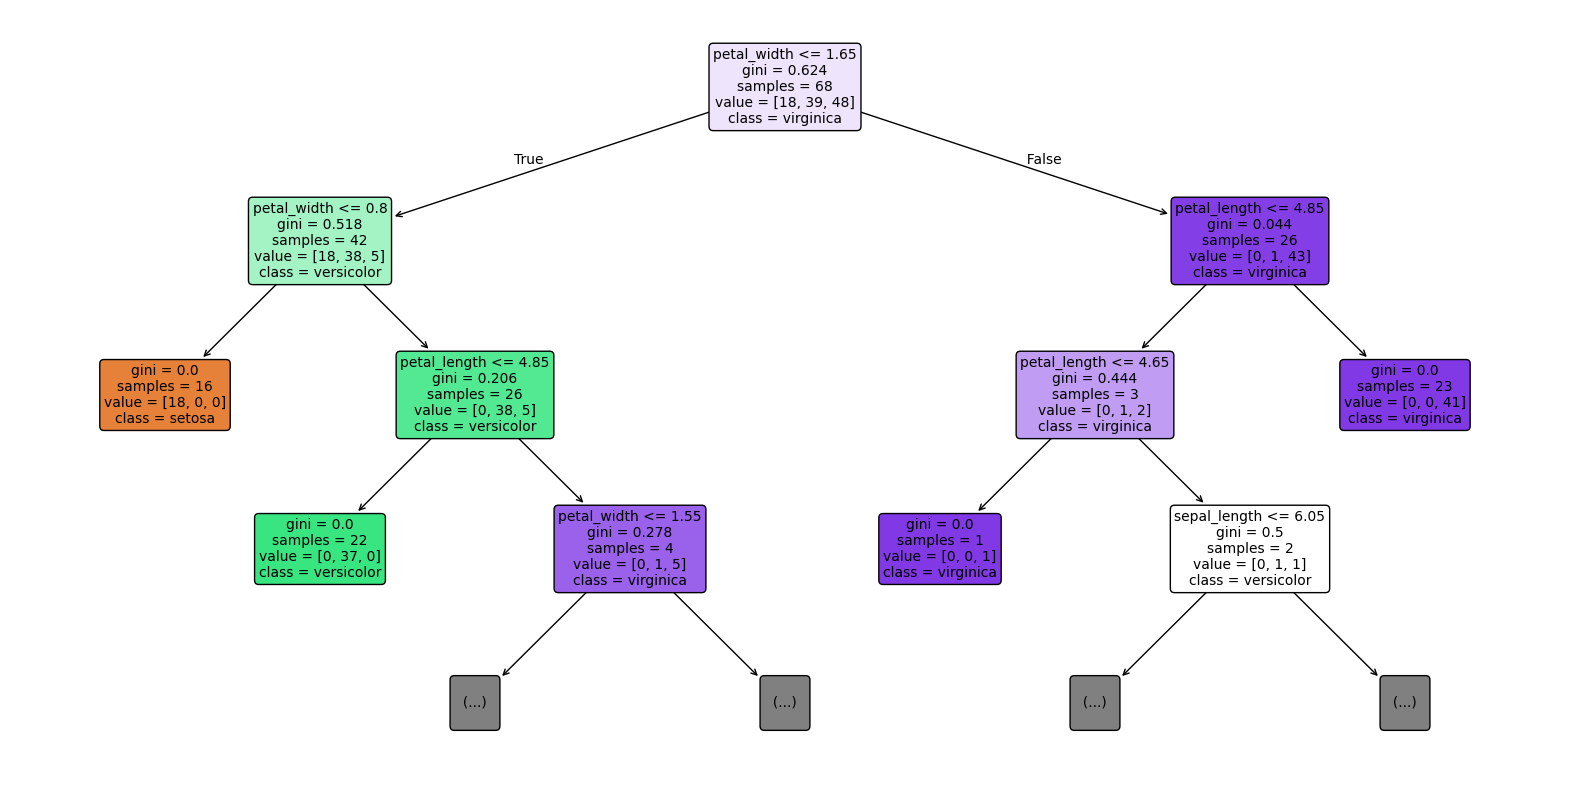

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sklearn.tree.plot_tree(clf.estimators_[0], 
          feature_names=features, 
          class_names=np.unique(y_str),
          filled=True, rounded=True,
          max_depth=3, fontsize=10)


<Axes: >

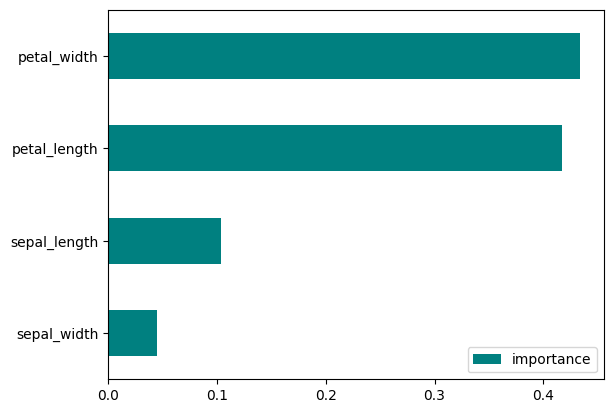

In [17]:
importances = clf.feature_importances_
forest_importances = pd.DataFrame(importances, columns=["importance"], index=features)

forest_importances.sort_values("importance").plot(kind='barh', color='teal')


# 4) Exercice

On va utiliser le dataset titanic pour predire la survie des individus.

Etapes:
 1. Lire le dataset
 2. Garder seulemennt les colonnes ['Survived', 'Age', 'Fare', 'Sex', 'Embarked']
 3. Faire la classification
 4. Faire le compte rendu



# Solution 